In [859]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

Zadanie 1

a)

In [860]:
np.random.seed(105454441)

x = np.dot(np.random.rand(2, 2), np.random.rand(2, 200)).T

b)

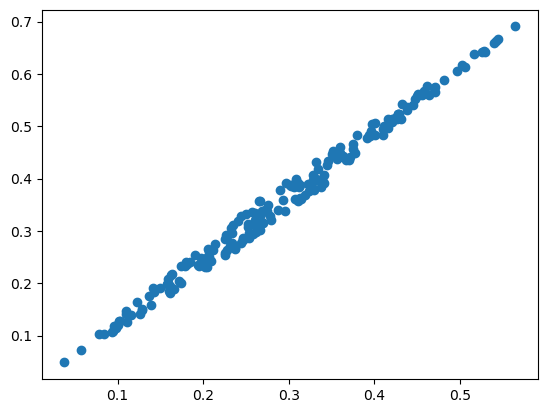

In [861]:
plt.scatter(x[:, 0], x[:, 1]);

c)

In [862]:
# def wiPCA(x, n_components = 2):
#     mean = np.mean(x, axis = 0)
#     x_m = x - mean
#     cov_matrix = np.cov(x_m.T)

#     eigen_val, eigen_vec = np.linalg.eigh(cov_matrix)

#     sorted_indices = np.argsort(eigen_val)[::-1]
#     eigen_val, eigen_vec = eigen_val[sorted_indices], eigen_vec[:, sorted_indices]

#     principal_components = eigen_vec[:, : n_components]

#     x_pca = np.dot(x_m, principal_components)
#     x_pca = np.dot(principal_components.T, x_m.T).T
#     return x_pca, eigen_val, eigen_vec, principal_components


def wiPCA_reconstruct(_x_reduced, _eigen_vec, _mean):
    # if n_components is None:
    #     n_components = len(_eigen_vec[0])
    _x_reconstructed = np.dot(_x_reduced, _eigen_vec.T) + _mean
    # x_reconstructed = np.dot(x_reduced[:, :n_components], _eigen_vec.T[:n_components, :]) + mean
    
    return _x_reconstructed

# poprawiona wersja
def wiPCA(x, n_components = 2):
    mean_vec = np.mean(x, axis = 0)
    x_m = x - mean_vec
    cov_matrix = np.cov(x_m.T)

    eigen_val, eigen_vec = np.linalg.eigh(cov_matrix)

    sorted_indices = np.argsort(eigen_val)[::-1][:n_components]
    eigen_val, eigen_vec = eigen_val[sorted_indices], eigen_vec[:, sorted_indices]

    x_pca = np.dot(x_m, eigen_vec)
    return x_pca, eigen_val, eigen_vec, mean_vec



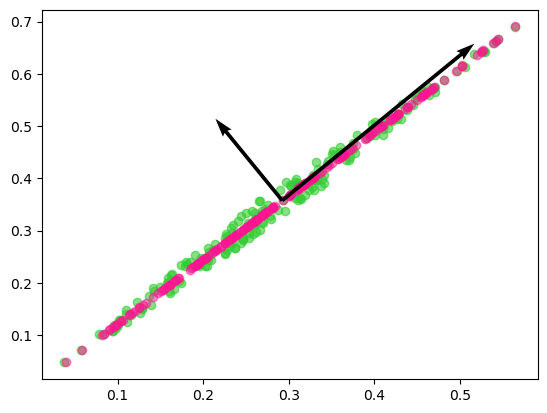

In [863]:
x_reduced, eigen_val, eigen_vec, mean_vec = wiPCA(x, 1)
# x_reduced, eigen_val, eigen_vec, mean_vec = wiPCA(x, 2)
origin = [np.mean(x[:, 0]), np.mean(x[:, 1])]

eig_vec2 = eigen_vec[1,0], eigen_vec[0,0]
eig_vec1 = -eigen_vec[0,0], eigen_vec[1,0]
plt.scatter(x[:, 0], x[:, 1], alpha=0.6, c='limegreen');
# eig_vec1 = eigen_vec[0,:]
# eig_vec2 = eigen_vec[1,:]

x_mean = np.mean(x, axis=0)
x_reconstructed = wiPCA_reconstruct(x_reduced, eigen_vec, x_mean)
plt.scatter(x_reconstructed[:, 0], x_reconstructed[:, 1], alpha=0.5, c='deeppink')

plt.quiver(*origin, *eig_vec1, color='k', scale_units='height', scale=3.5)
plt.quiver(*origin, *eig_vec2, color='k', scale_units='width', scale=2);

# do porównania
# pca = PCA(n_components=1)
# # pca = PCA(n_components=2)
# X_reduced = pca.fit(x).transform(x)
# X_reconstructed = pca.inverse_transform(X_reduced)
# plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.3, c='chartreuse');


Zadanie 2

a)

In [864]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

b)

In [865]:
x_reduced, eigen_val, eigen_vec, mean_vec = wiPCA(x, 2)

c)

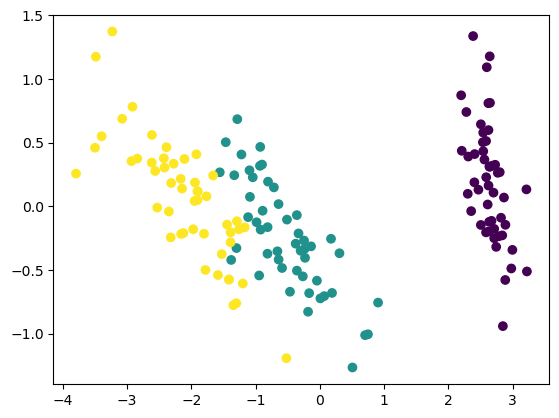

In [866]:
# x_reduced[:, 0] = np.negative(x_reduced[:, 0])
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y);
# plt.gca().invert_xaxis()

# na stronie https://www.askpython.com/python/examples/principal-component-analysis wykres wychodzi chyba taki sam, ale w pdf do zadań jest odbity, nie wiem czemu

Zadanie 3

a)

In [867]:
digits = datasets.load_digits()

x = digits.data
y = digits.target

b)

In [868]:
x_reduced, eigen_val, eigen_vec, mean_vec = wiPCA(x, 2)

# pca = PCA(n_components=2)
# X_reduced = pca.fit(x).transform(x)
# X_reconstructed = pca.inverse_transform(X_reduced)

# x_mean = np.mean(x, axis=0)
# x_reconstructed = wiPCA_reconstruct(x_reduced, eigen_vec, x_mean)
x.shape
x_reduced.shape
x_mean = np.mean(x, axis=0)
x_reconstructed = wiPCA_reconstruct(x_reduced, eigen_vec, x_mean)

# print(x - x_reconstructed)
# np.cumsum(x - x_reconstructed).shape

c)

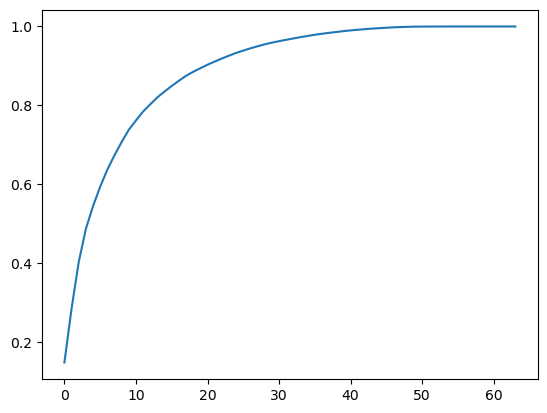

In [869]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

d)

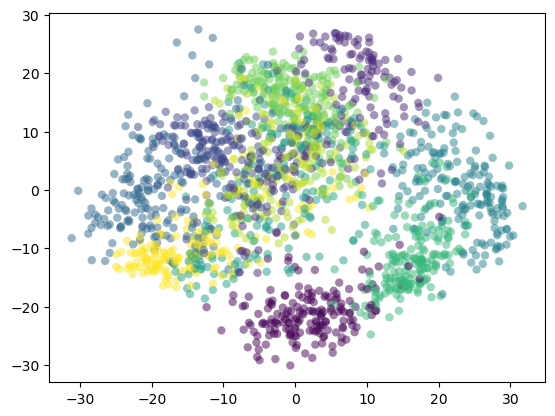

In [870]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y, edgecolor='none', alpha=0.5);

# plt.gca().invert_yaxis()
# obrócone góra-dół

# x_mean = np.mean(x, axis=0)
# x_reconstructed = wiPCA_reconstruct(x_reduced, principal_components, x_mean)
# plt.scatter(x_reconstructed[:, 0], x_reconstructed[:, 1], alpha=0.5, c='deeppink')

# pca = PCA(n_components=2)
# X_reduced = pca.fit(x).transform(x)
# X_reconstructed = pca.inverse_transform(X_reduced)
# X_reconstructed = np.round(X_reconstructed, 3)
# plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.3, c='chartreuse');
# print(x_reconstructed[0, :5])
# print("----")
# X_reconstructed.shape

# print(X_reconstructed[0, :5])
# print(x_reconstructed[0, :5])



e)

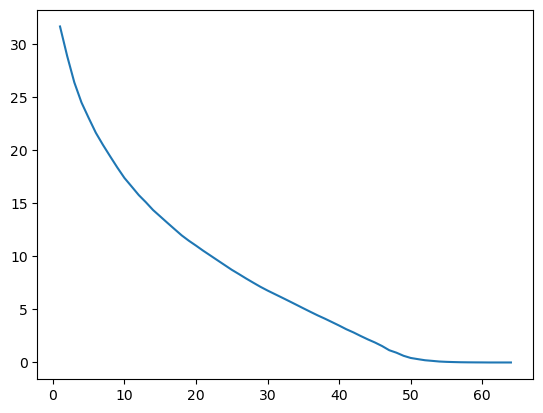

In [871]:
ndim = x.shape[1]
x_mean = np.mean(x, axis = 0)
y = np.zeros(ndim)
from sklearn.metrics.pairwise import pairwise_distances
for i in range(1, ndim + 1):
    x_reduced, eigen_val, eigen_vec, mean_vec = wiPCA(x, i)
    x_reconstructed = wiPCA_reconstruct(x_reduced, eigen_vec, x_mean)

    y[i-1] = np.mean(np.sqrt(np.sum((x - x_reconstructed) ** 2, axis=1)))


plt.plot(np.arange(1, ndim + 1), y)
# y